## SECTION 2
### Big Mart Dataset Analysis
Reading dataset with pandas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

df = pd.read_csv('../dataset/SECTION TWO DATA SET/bigmart_data.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7870 non-null   object 
 1   Item_Weight                6520 non-null   float64
 2   Item_Fat_Content           7870 non-null   object 
 3   Item_Visibility            7870 non-null   float64
 4   Item_Type                  7870 non-null   object 
 5   Item_MRP                   7870 non-null   float64
 6   Outlet_Identifier          7870 non-null   object 
 7   Outlet_Establishment_Year  7870 non-null   int64  
 8   Outlet_Size                5641 non-null   object 
 9   Outlet_Location_Type       7870 non-null   object 
 10  Outlet_Type                7870 non-null   object 
 11  Item_Outlet_Sales          7869 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 737.9+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6520.000000,7870.000000,7870.000000,7870.000000,7869.000000
mean,12.871142,0.066408,140.960657,1997.803812,2180.520383
std,4.648008,0.051742,62.203383,8.369782,1709.573781
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.027049,93.752150,1987.000000,838.908000
50%,12.600000,0.054367,142.895700,1999.000000,1787.007200
75%,16.850000,0.095346,185.757550,2004.000000,3095.970000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Univariate Analysis
#### Exploring each variable in the dataset
##### Numerical Predictors

In [5]:
num_features = df.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

Correlation between Numerical Predictors

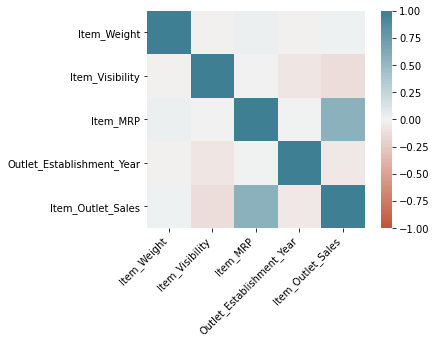

In [6]:
corr = num_features.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013506,0.025389,-0.010697,0.009981
Item_Visibility,-0.013506,1.000000,-0.006143,-0.076612,-0.131359
Item_MRP,0.025389,-0.006143,1.000000,0.006343,0.567738
Outlet_Establishment_Year,-0.010697,-0.076612,0.006343,1.000000,-0.055754
Item_Outlet_Sales,0.009981,-0.131359,0.567738,-0.055754,1.000000


From the above result: 
- An increate in `Item_MPR` leads to an increase of other numerical variables, except for`Item_visibility`
- `Item_Visibility` : has no positive correlation
- `Item_outlet_Sales` : Item_MRP has the most positive correlation and Item_Visibility has the lowest correlation
- From `Outlet_Establishment_Year`, Newer outlets tend to go for items with less weight

Skew is: 1.1880075827998173
Kurtosis: 1.649996


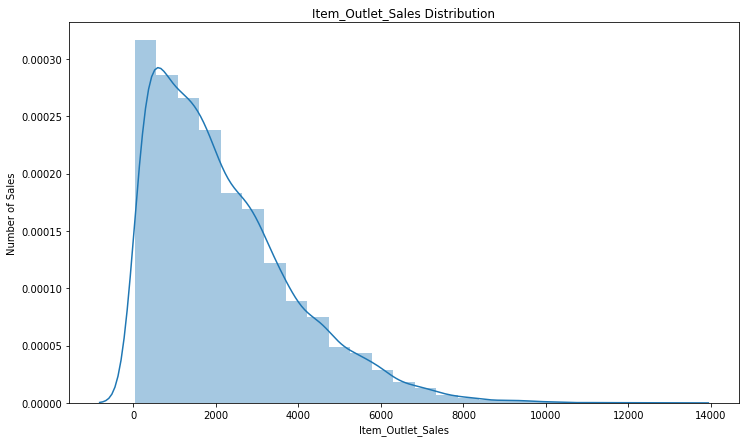

In [8]:
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

print ("Skew is:", df.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df.Item_Outlet_Sales.kurt())

We can see that our target variable `Item_Outlet_Sales` is skewed towards the right

##### Categorical Predictors
Distribution of Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

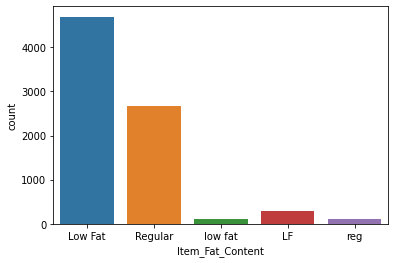

In [9]:
sns.countplot(df.Item_Fat_Content)

Distribution of the Item_Type

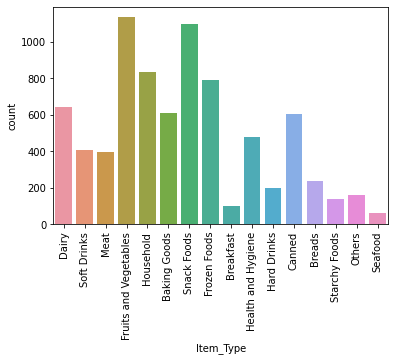

In [10]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)
plt.show()

Distribution of the Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

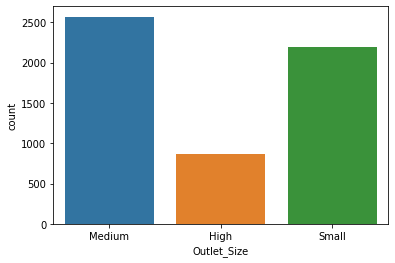

In [11]:
sns.countplot(df.Outlet_Size)

There seems to be less number of stores with size equals to High.

Distribution of the Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

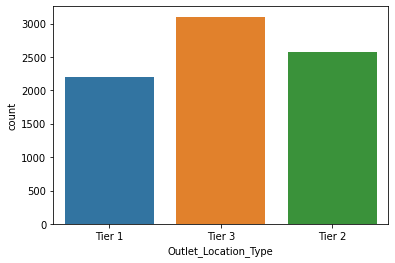

In [12]:
sns.countplot(df.Outlet_Location_Type)

From the above graph we can see that Bigmart is a brand of medium and small size city compare to densely populated area.

Distribution of the Outlet_Type

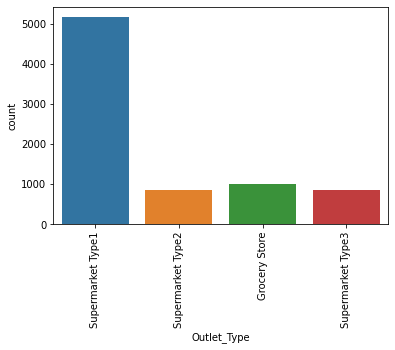

In [13]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

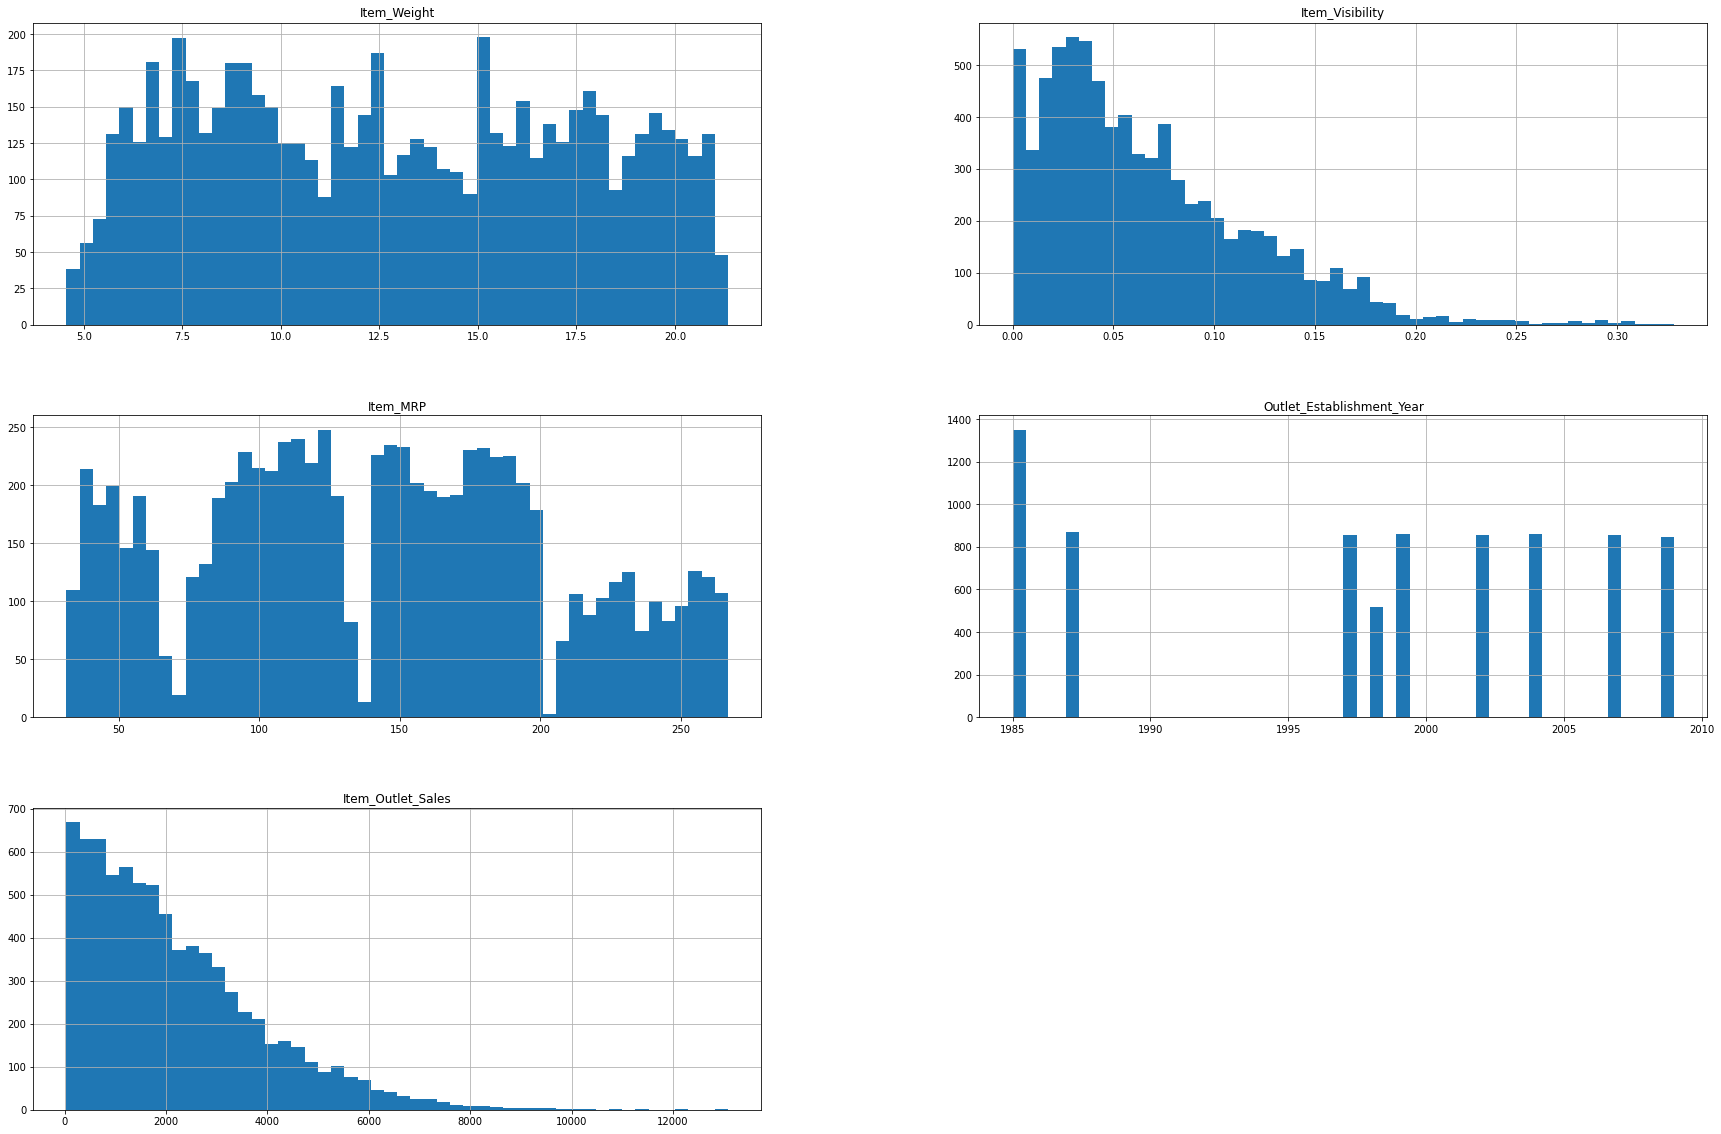

In [15]:
df.hist(bins=50, figsize=(30,20));

Item_Weight and Item_Outlet_Sales analysis

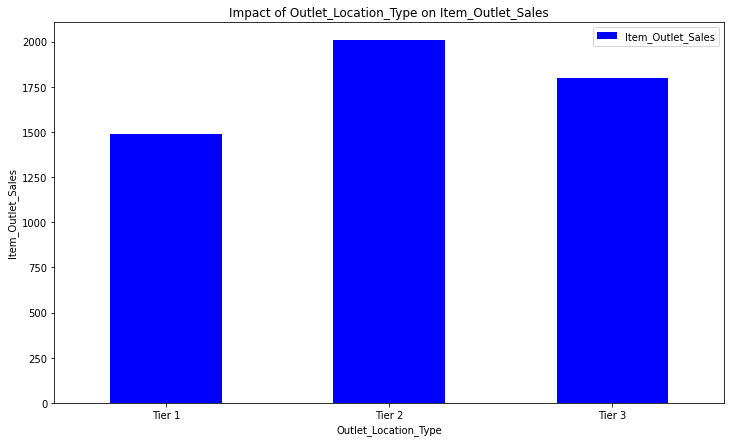

In [14]:
Outlet_Location_Type_pivot = df.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

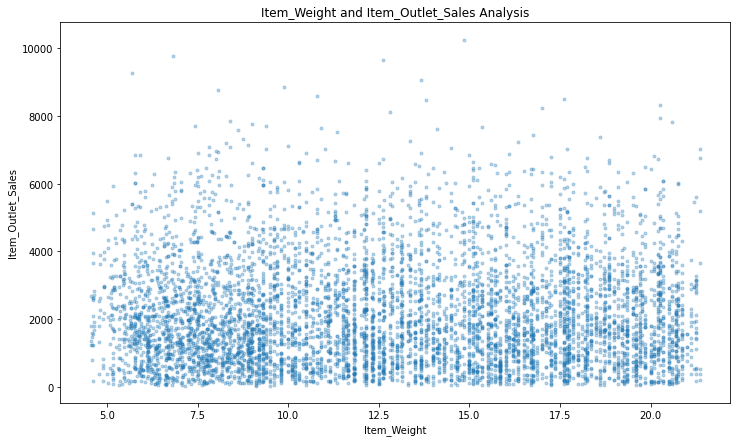

In [30]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.3)
plt.show()

### Multivariate Analysis

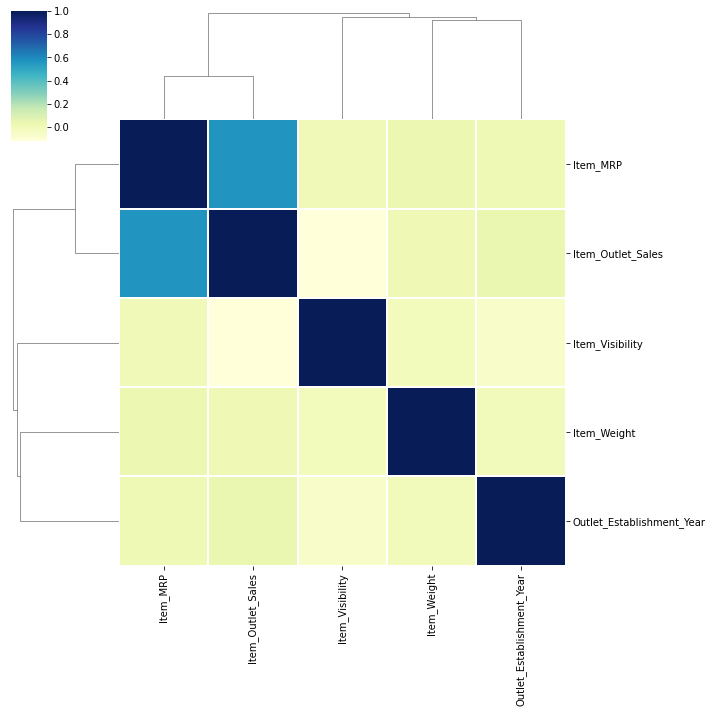

In [17]:
corrmat = df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

### saleprice correlation matrix

<AxesSubplot:>

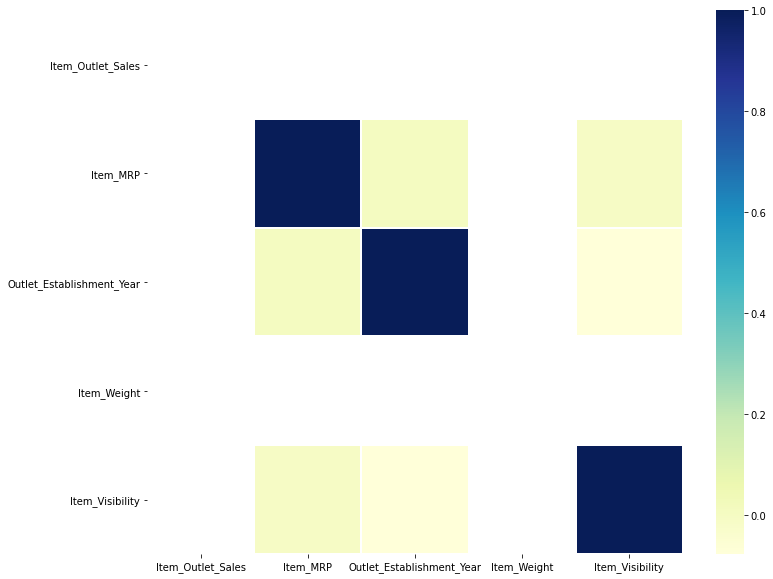

In [18]:

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Item_Outlet_Sales')['Item_Outlet_Sales'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

